In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

In [4]:
datapath = '~/Desktop/interview-prep/data-science/Code/breastCancer.csv'
data = pd.read_csv(datapath)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


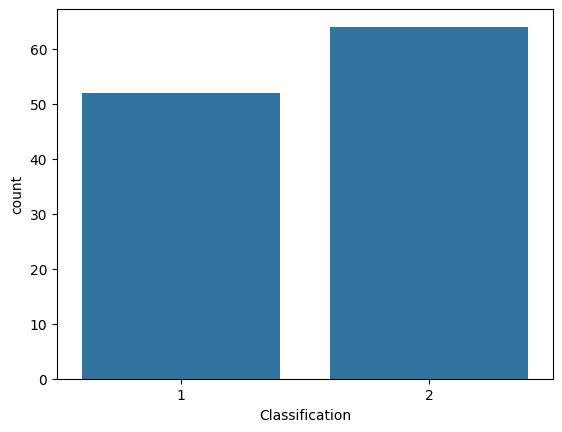

In [5]:
x = data['Classification']
ax = sns.countplot(x = x, data = data)

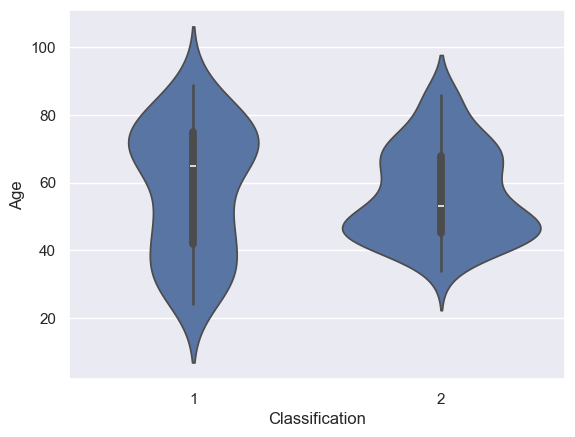

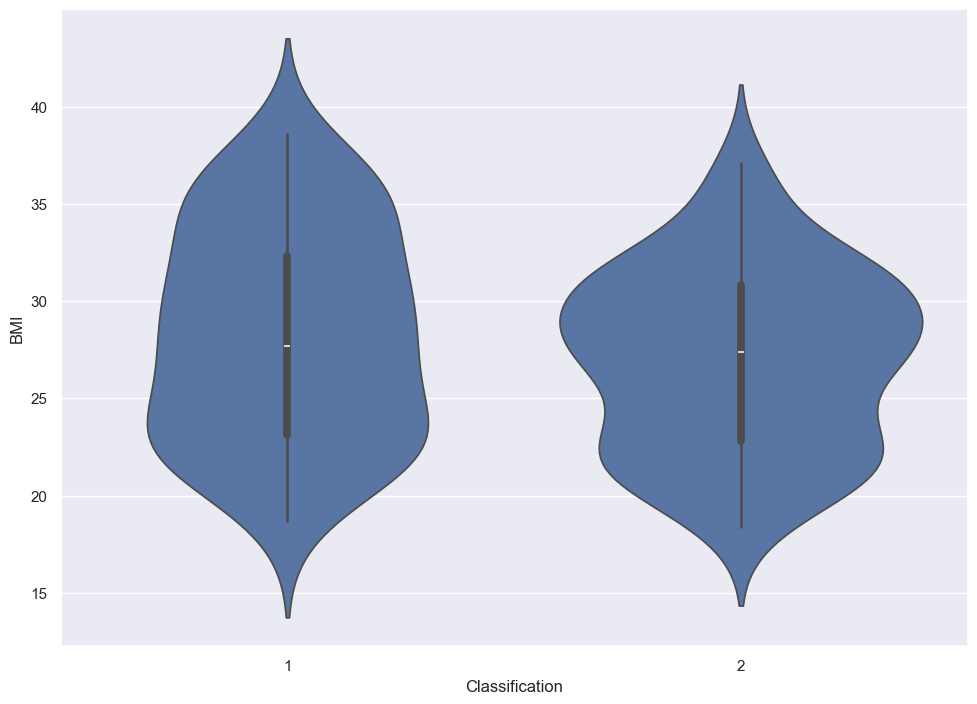

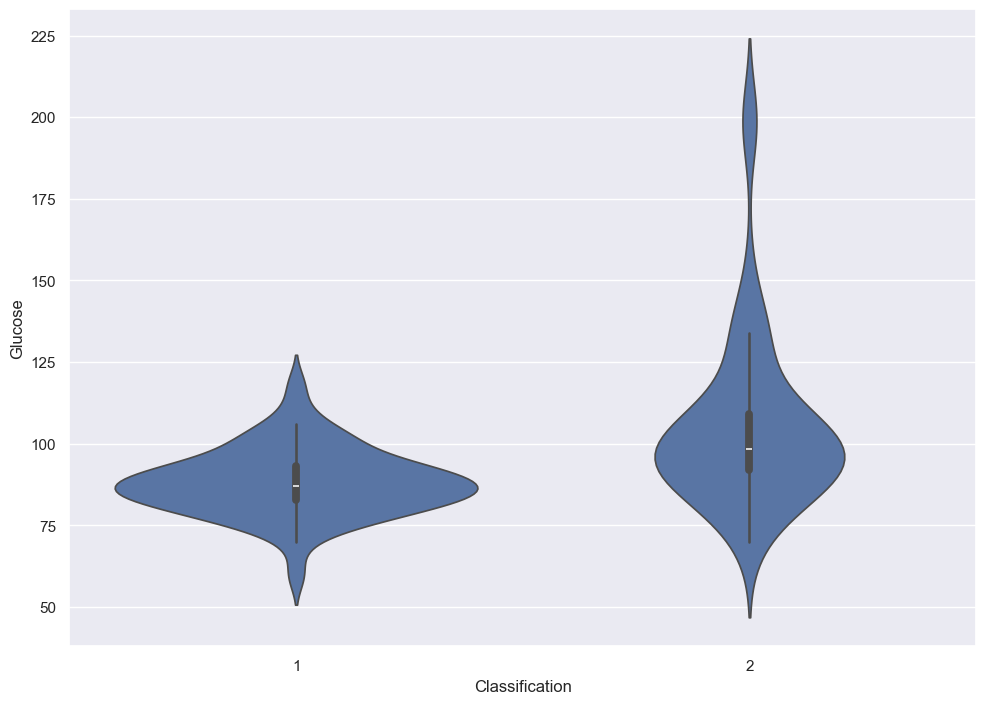

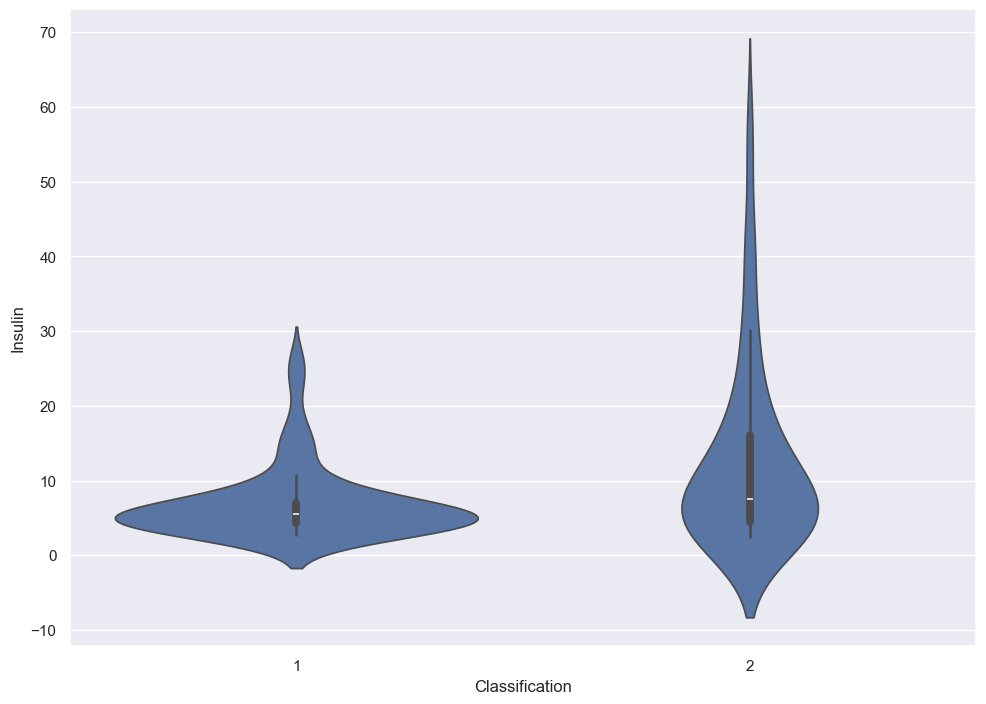

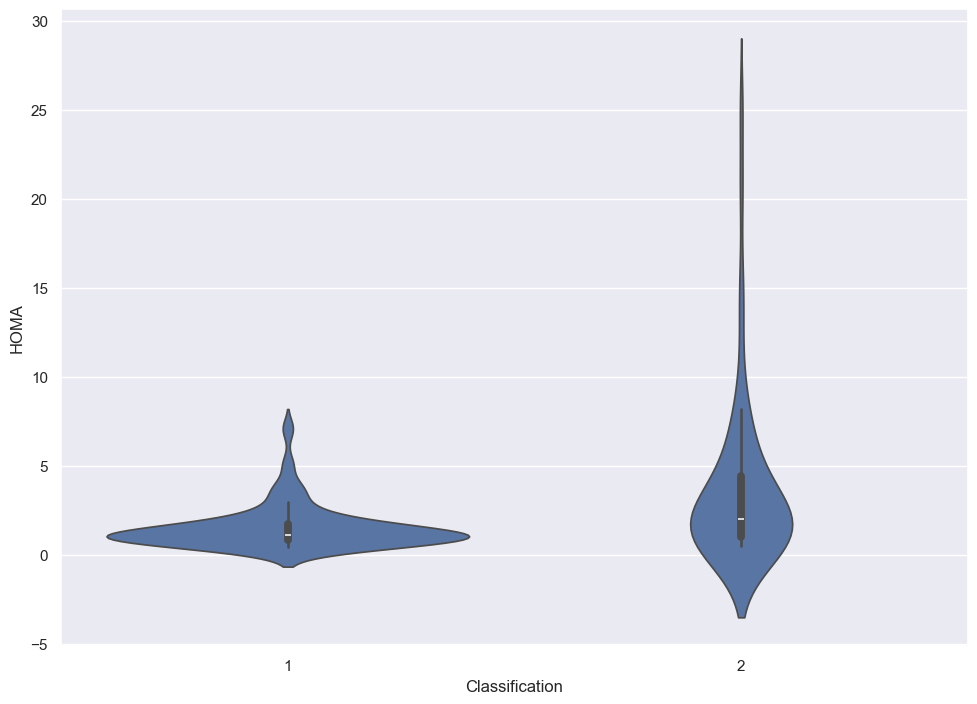

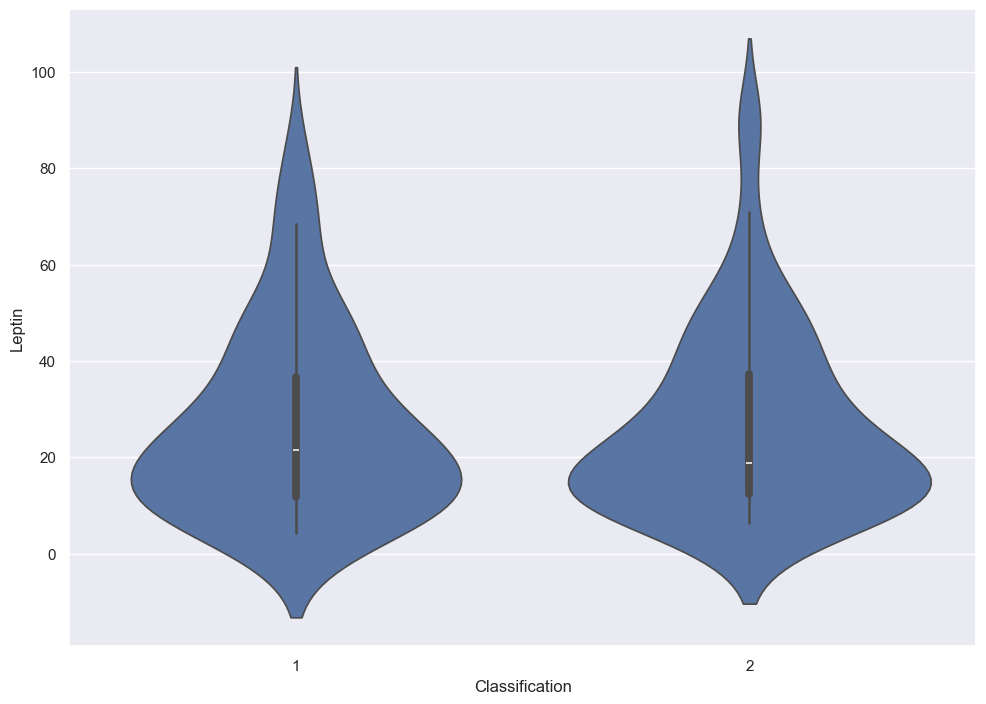

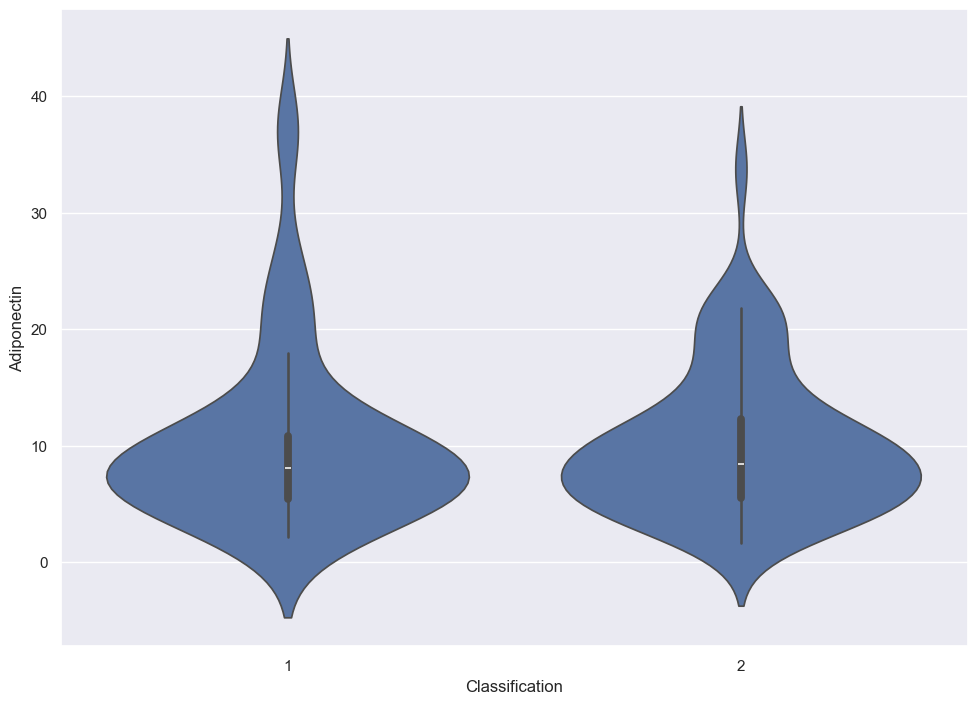

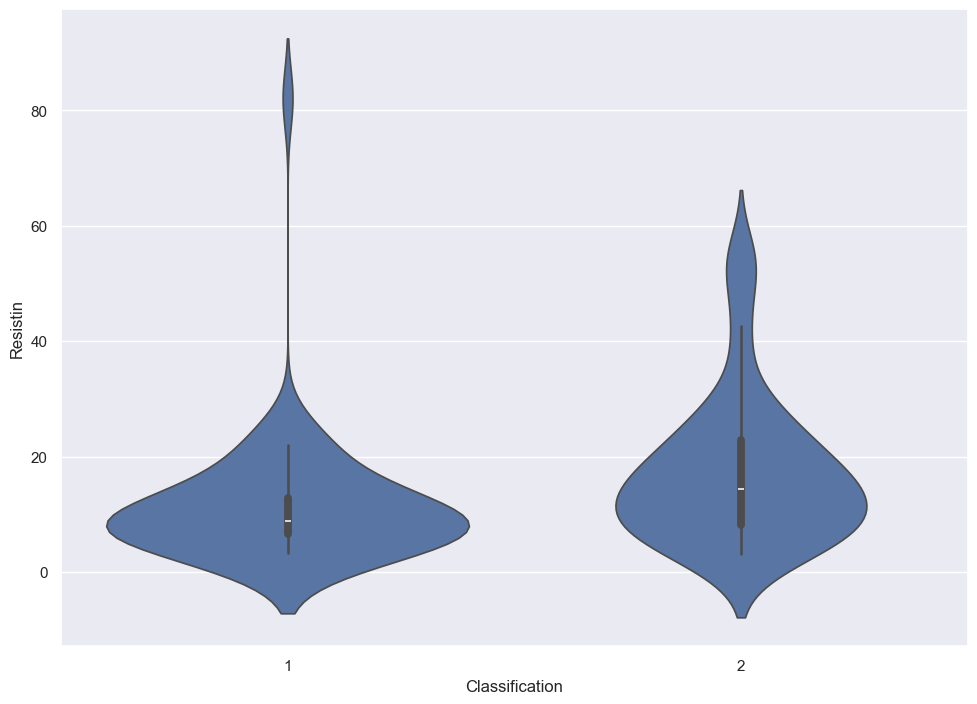

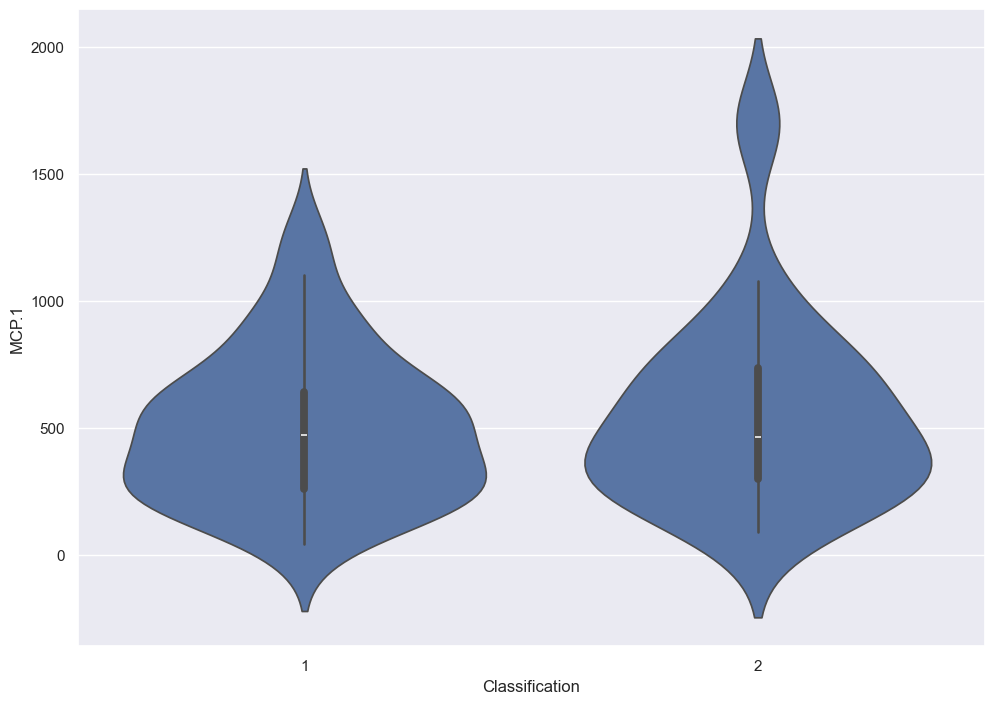

In [6]:
def violin_plots(x, y, data): 
    for i, col in enumerate(y): 
        plt.figure(i)
        sns.set(rc = {'figure.figsize':(11.7, 8.27)})
        ax = sns.violinplot(x = x, y = col, data = data)

y = data.columns[:-1]
x = data.columns[-1]

violin_plots(x, y, data)

In [8]:
for col in data.columns: 
    print(f'{col}: {data[col].isnull().sum()}')

Age: 0
BMI: 0
Glucose: 0
Insulin: 0
HOMA: 0
Leptin: 0
Adiponectin: 0
Resistin: 0
MCP.1: 0
Classification: 0


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [11]:
from sklearn.model_selection import train_test_split

y = data['Classification'].values.reshape(-1, 1)
X = data.drop(['Classification'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

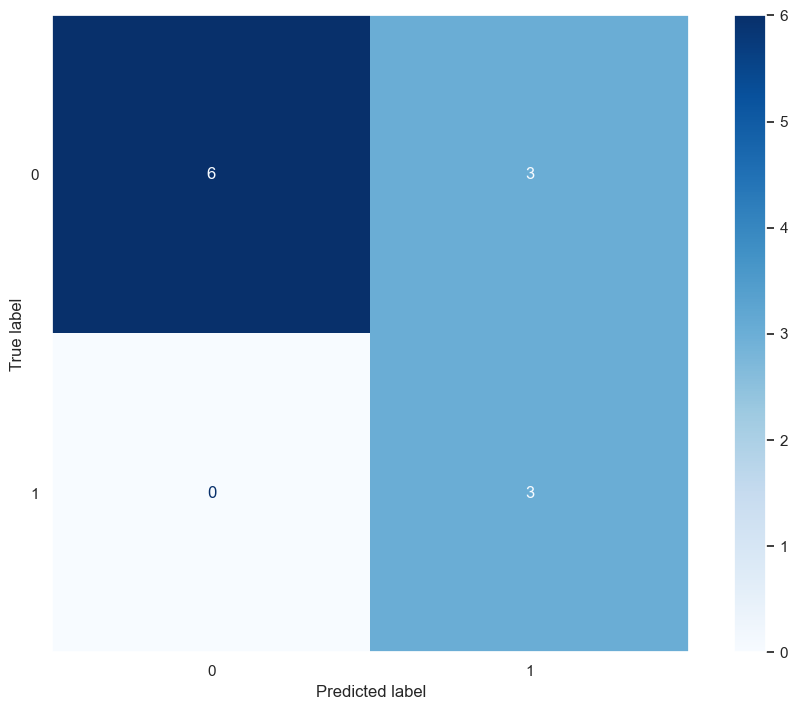

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

[Text(0.4861111111111111, 0.9285714285714286, 'x[2] <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]'),
 Text(0.3055555555555556, 0.7857142857142857, 'x[0] <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28.0, 15.0]'),
 Text(0.39583333333333337, 0.8571428571428572, 'True  '),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3611111111111111, 0.6428571428571429, 'x[7] <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.1111111111111111, 0.35714285714285715, 'x[6] <= 7.189\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05555555555555555, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[7] <= 3.295\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.2777777777777778, 0.2142857142

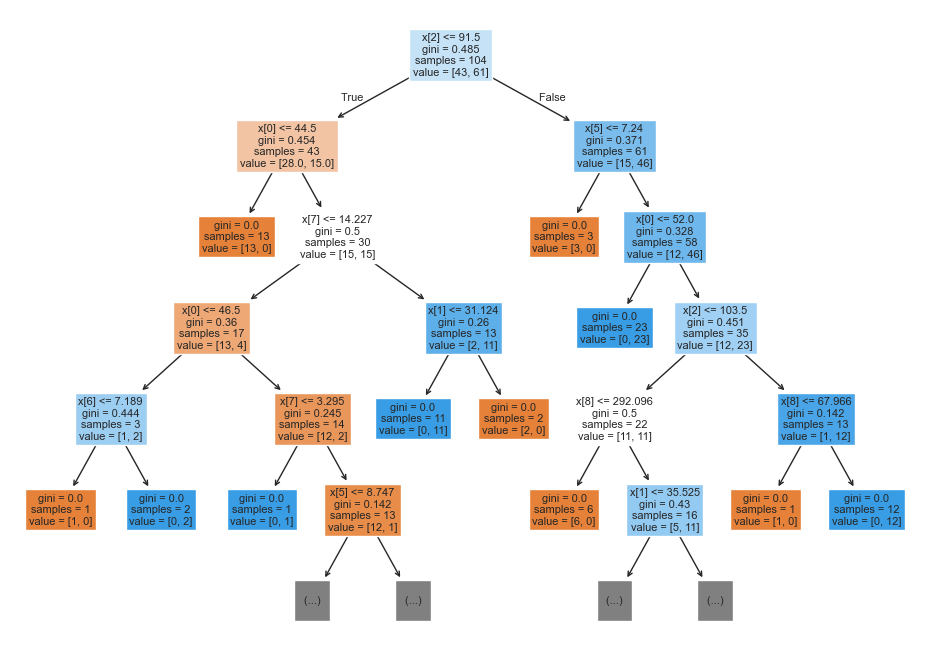

In [13]:
from sklearn.tree import plot_tree

plot_tree(clf, max_depth=5, filled=True)

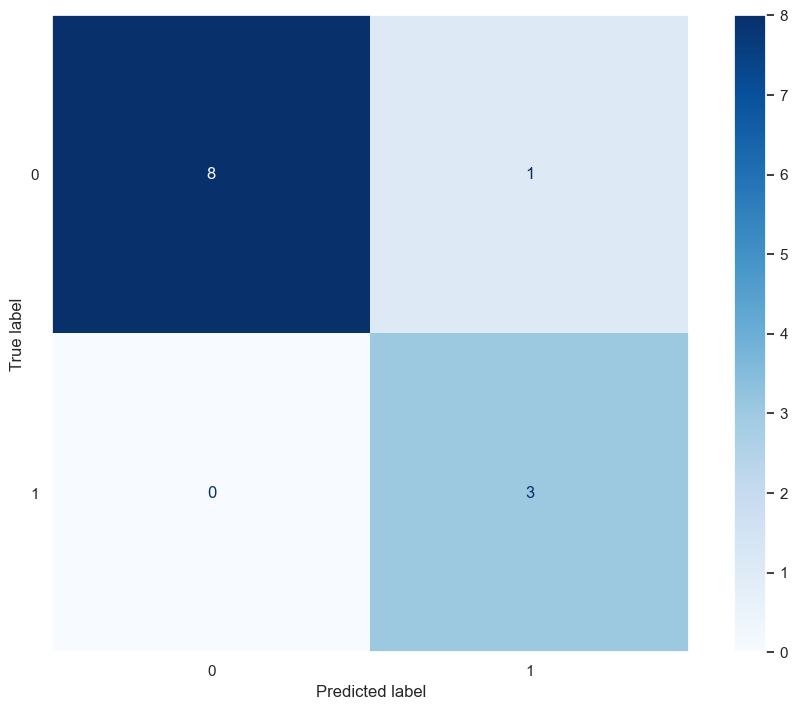

In [15]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier()

bagging_clf.fit(X_train, y_train.ravel())

ConfusionMatrixDisplay.from_estimator(bagging_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

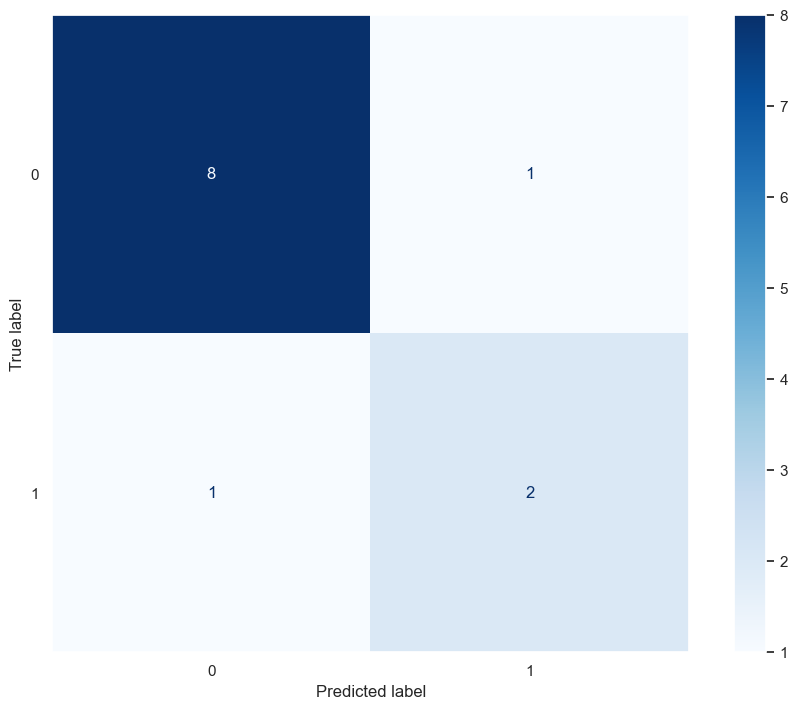

In [16]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(100)

random_clf.fit(X_train, y_train.ravel())

ConfusionMatrixDisplay.from_estimator(random_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

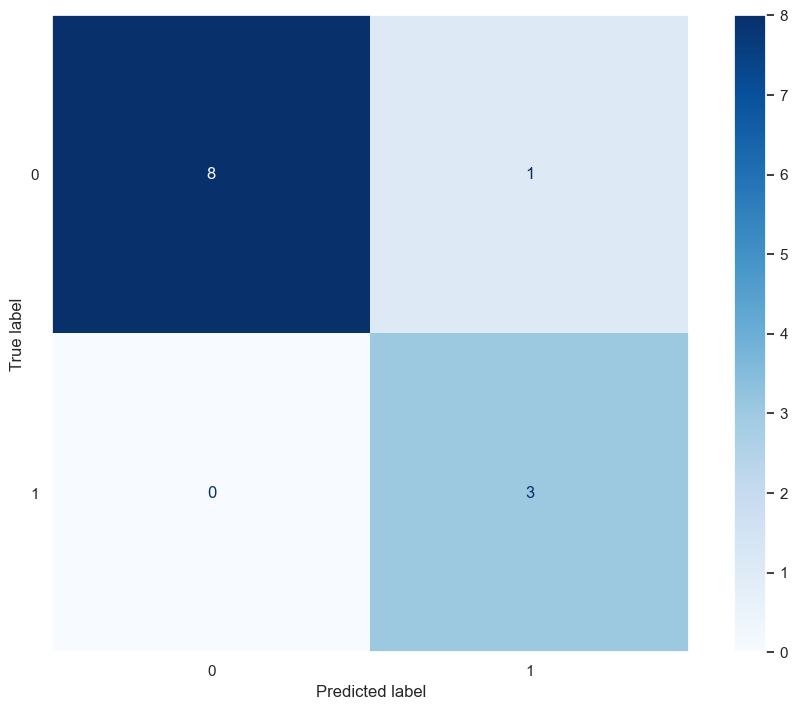

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(X_train, y_train.ravel())

ConfusionMatrixDisplay.from_estimator(boost_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()